<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/transfer_learning_without_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input

In [3]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!wget -nc https://archive.org/download/food-5-k/Food-5K.zip

--2025-01-23 05:07:17--  https://archive.org/download/food-5-k/Food-5K.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia601606.us.archive.org/13/items/food-5-k/Food-5K.zip [following]
--2025-01-23 05:07:17--  https://ia601606.us.archive.org/13/items/food-5-k/Food-5K.zip
Resolving ia601606.us.archive.org (ia601606.us.archive.org)... 207.241.227.86
Connecting to ia601606.us.archive.org (ia601606.us.archive.org)|207.241.227.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  96.2MB/s    in 4.5s    

2025-01-23 05:07:22 (95.2 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [5]:
!unzip -qq -o Food-5K.zip
!ls Food-5K/training

0_0.jpg     0_1338.jpg	0_325.jpg  0_663.jpg  1_0.jpg	  1_1338.jpg  1_325.jpg  1_663.jpg
0_1000.jpg  0_1339.jpg	0_326.jpg  0_664.jpg  1_1000.jpg  1_1339.jpg  1_326.jpg  1_664.jpg
0_1001.jpg  0_133.jpg	0_327.jpg  0_665.jpg  1_1001.jpg  1_133.jpg   1_327.jpg  1_665.jpg
0_1002.jpg  0_1340.jpg	0_328.jpg  0_666.jpg  1_1002.jpg  1_1340.jpg  1_328.jpg  1_666.jpg
0_1003.jpg  0_1341.jpg	0_329.jpg  0_667.jpg  1_1003.jpg  1_1341.jpg  1_329.jpg  1_667.jpg
0_1004.jpg  0_1342.jpg	0_32.jpg   0_668.jpg  1_1004.jpg  1_1342.jpg  1_32.jpg	 1_668.jpg
0_1005.jpg  0_1343.jpg	0_330.jpg  0_669.jpg  1_1005.jpg  1_1343.jpg  1_330.jpg  1_669.jpg
0_1006.jpg  0_1344.jpg	0_331.jpg  0_66.jpg   1_1006.jpg  1_1344.jpg  1_331.jpg  1_66.jpg
0_1007.jpg  0_1345.jpg	0_332.jpg  0_670.jpg  1_1007.jpg  1_1345.jpg  1_332.jpg  1_670.jpg
0_1008.jpg  0_1346.jpg	0_333.jpg  0_671.jpg  1_1008.jpg  1_1346.jpg  1_333.jpg  1_671.jpg
0_1009.jpg  0_1347.jpg	0_334.jpg  0_672.jpg  1_1009.jpg  1_1347.jpg  1_334.jpg  1_672.jpg
0_100.jpg   0_1

In [6]:
!mv Food-5K/* .
!ls

evaluation  Food-5K  Food-5K.zip  __MACOSX  sample_data  training  validation


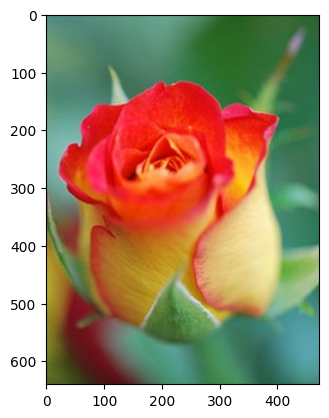

In [7]:
from tensorflow.keras.preprocessing import image
plt.imshow(image.load_img('training/0_808.jpg'))

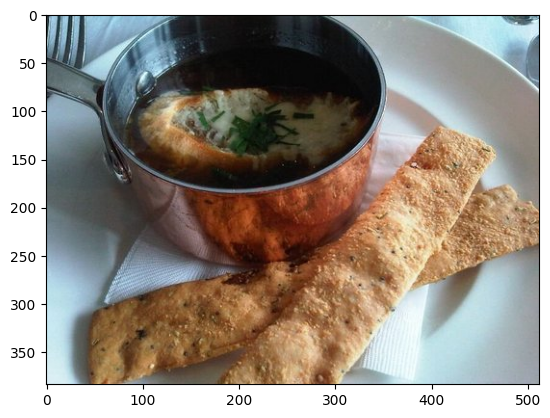

In [8]:
plt.imshow(image.load_img('training/1_0.jpg'))

In [9]:
!mkdir data
!ls

data  evaluation  Food-5K  Food-5K.zip	__MACOSX  sample_data  training  validation


In [10]:
!mkdir data/train
!mkdir data/test

!mkdir data/train/non_food
!mkdir data/train/food
!mkdir data/test/non_food
!mkdir data/test/food

!mv training/0*.jpg data/train/non_food
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/non_food
!mv validation/1*.jpg data/test/food

In [11]:
train_path = 'data/train'
valid_path = 'data/test'

In [12]:
IMAGE_SIZE = [200 , 200]

In [13]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [14]:
folders = glob(train_path + '/*')
folders

['data/train/food', 'data/train/non_food']

In [15]:
K = len(folders)
K

2

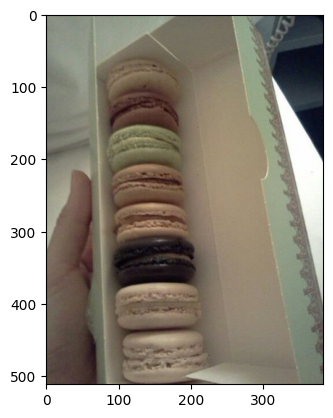

In [16]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [17]:
ptm = PretrainedModel(
    input_shape = IMAGE_SIZE + [3],
    weights = 'imagenet',
    include_top = False
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
ptm.trainable = False

In [19]:
#build modell with functional api

i = tf.keras.layers.Input(shape = IMAGE_SIZE + [3])
x = preprocess_input(i)
x = ptm(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(K,activation='softmax')(x)

model = tf.keras.models.Model(i,x)

In [20]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 200, 200)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 200, 200)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 200, 200)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 200, 200, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 200, 200, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 6, 6, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 18432)          │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 2)              │         36,866 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,751,554 (56.27 MB)

 Trainable params: 36,866 (144.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
batch_size = 128
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size = IMAGE_SIZE,
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    image_size = IMAGE_SIZE,
    batch_size = batch_size
)

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [23]:
r = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.8711 - loss: 2.2228 - val_accuracy: 0.9720 - val_loss: 0.6664
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 580ms/step - accuracy: 0.9920 - loss: 0.1469 - val_accuracy: 0.9730 - val_loss: 0.5717
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 613ms/step - accuracy: 0.9974 - loss: 0.0402 - val_accuracy: 0.9760 - val_loss: 0.5529
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 605ms/step - accuracy: 0.9987 - loss: 0.0103 - val_accuracy: 0.9730 - val_loss: 0.9692
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 584ms/step - accuracy: 0.9985 - loss: 0.0030 - val_accuracy: 0.9730 - val_loss: 0.6782
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 585ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9750 - val_loss: 0.8635
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 606ms/step - accuracy: 0.9982 - loss: 0.0149 - val_accuracy: 0.9710 - val_loss: 0.6733
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 660ms/step - accuracy: 0.9999 - loss: 6.1415e-05 - val_ac

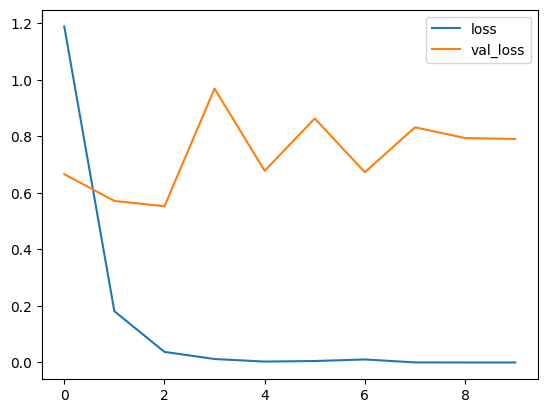

In [24]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

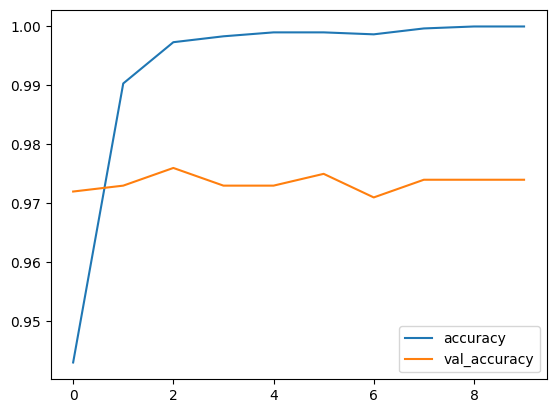

In [25]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [27]:
x = tf.keras.layers.Flatten()(ptm.output)
model = tf.keras.models.Model(ptm.input,x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 200, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 100, 100, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 100, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 50, 50, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 25, 25, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [37]:
# feat = model.predict(np.random.random([1] + IMAGE_SIZE + [3]))
# D = feat.shape[1]
# D

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


18432

In [30]:
train_ds = train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [31]:
X_train = model.predict(train_ds)
X_valid = model.predict(val_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 463ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 455ms/step


In [32]:
#this will not worl if you shuffle the train set
Y_train = np.concatenate([y for x,y in train_ds])
Y_valid = np.concatenate([y for x,y in val_ds])

In [33]:
X_train.shape , Y_train.shape , X_valid.shape , Y_valid.shape

((3000, 18432), (3000,), (1000, 18432), (1000,))

In [34]:
X_train.max() , X_train.min()

(704.6174, 0.0)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_valid2 = scaler.transform(X_valid)

In [36]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train2,Y_train)
print(logr.score(X_train2,Y_train))
print(logr.score(X_valid2,Y_valid))

1.0
0.967


In [39]:
D = X_train2.shape[1]
i = tf.keras.layers.Input(shape = (D,))
x = tf.keras.layers.Dense(1,activation='sigmoid')(i)
linearmodel = tf.keras.Model(i,x)

In [40]:
linearmodel.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [41]:
r = linearmodel.fit(
    X_train2,Y_train,
    validation_data = (X_valid2,Y_valid),
    epochs = 10,
    batch_size = 128
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8664 - loss: 0.2981 - val_accuracy: 0.9650 - val_loss: 0.1218
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9957 - loss: 0.0242 - val_accuracy: 0.9640 - val_loss: 0.1152
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9998 - loss: 0.0070 - val_accuracy: 0.9660 - val_loss: 0.1164
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9999 - loss: 0.0043 - val_accuracy: 0.9640 - val_loss: 0.1174
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9640 - val_loss: 0.1173
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9650 - val_loss: 0.1176
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9650 - val_loss: 0.1175
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9660 - val_los

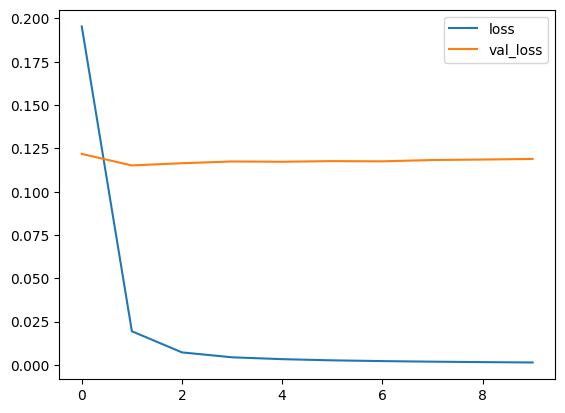

In [42]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

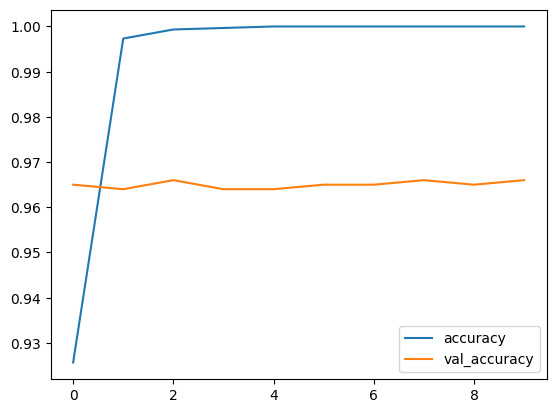

In [43]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()